<a href="https://colab.research.google.com/github/sandeshchand/profitPrediction/blob/main/profitPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
print('Hello world')

Hello world


A Prime equity fund has hired you as a data scientist to analyse the data of 50 potential investee companies and create a model that will find the type of companies that he should invest in to maximize the profit.They want to see which types of companies perform better, for eg -a company which spends on marketing or which spends more on R&D

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns
import sklearn 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
data=pd.read_csv(r'http://www.edureka.co/medias/fohk3v2vso/download?media_file_id=218717198')
data.head(5)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [ ]:
data.shape

(50, 5)

In [ ]:
data.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


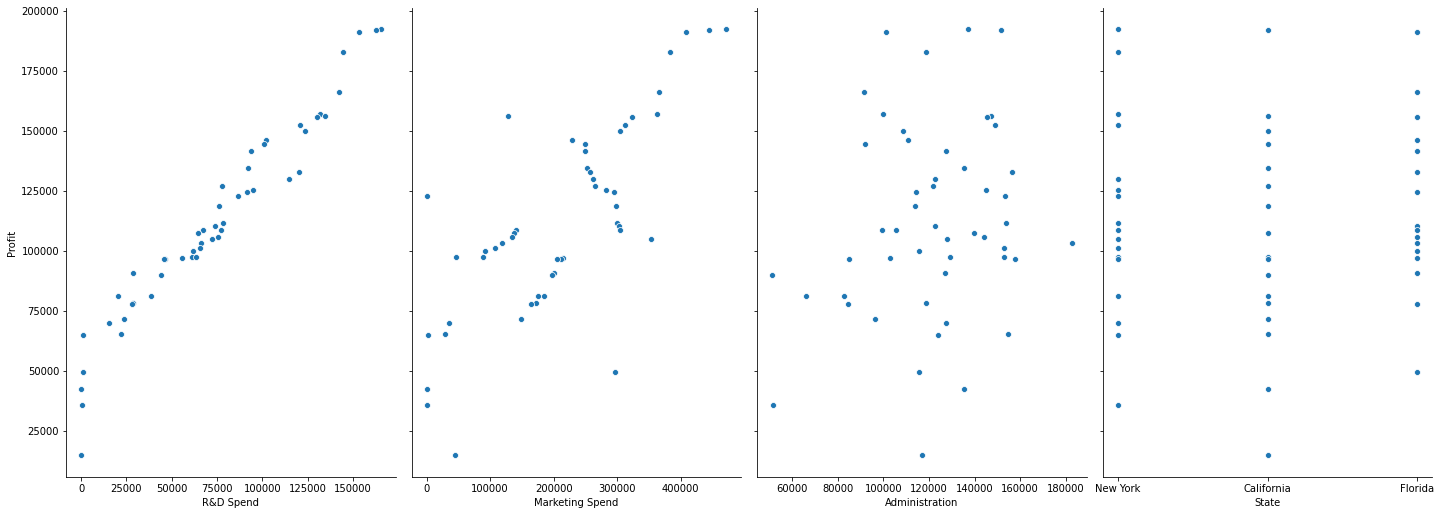

In [ ]:
sns.pairplot(data,x_vars=['R&D Spend','Marketing Spend','Administration','State'],y_vars='Profit',size=7,aspect=0.7)

In [ ]:
feat_col=['R&D Spend','Administration','Marketing']
X=data.drop('State',axis=1)
Y=data['Profit']
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=5)
lm=LinearRegression()
model=lm.fit(X_train,Y_train)
print('Intercept:{}'.format(model.intercept_))
print('cofficient:{}'.format(model.coef_))
prediction=model.predict(X_test)



Intercept:-1.4551915228366852e-11
cofficient:[-7.22347821e-17  2.77555756e-16 -5.55111512e-17  1.00000000e+00]


In [ ]:
list(zip(feat_col,model.coef_))

[('R&D Spend', -7.223478206255733e-17),
 ('Administration', 2.7755575615628914e-16),
 ('Marketing Spend', -5.551115123125783e-17)]

In [ ]:
totalData=pd.DataFrame(prediction,Y_test)
print(totalData)

                   0
Profit              
71498.49    71498.49
101004.64  101004.64
156122.51  156122.51
122776.86  122776.86
103282.38  103282.38
125370.37  125370.37
191050.39  191050.39
69758.98    69758.98
182901.99  182901.99
111313.02  111313.02


In [ ]:
mse=mean_squared_error(prediction,Y_test)
print(mse)
print(np.sqrt(mse))

1.4823076576950255e-22
1.2175005781087028e-11


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


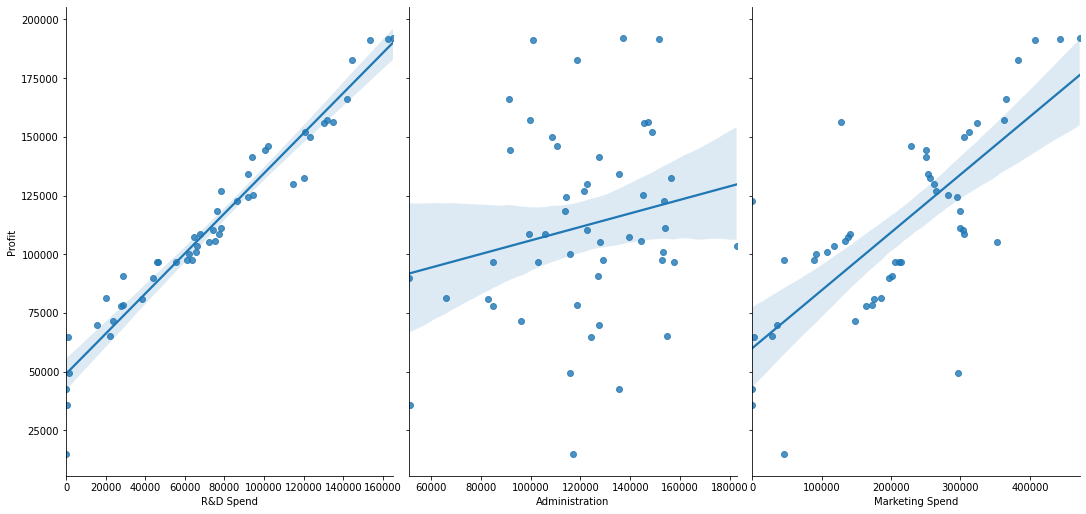

In [ ]:
sns.pairplot(data, x_vars=['R&D Spend','Administration','Marketing Spend'], y_vars='Profit', size=7, aspect=0.7, kind='reg')

From the above figure it shows that there is less error between datas and best fitting line in R&D Spend than Marketing spend.R&D company better perform better in proft case.